In [4]:

#temp and humidity are at 2m

import datetime
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score






In [5]:
location_options = {
    1: ("New York, NY", "40.7751", "-73.9664"),
    2: ("Fort Collins, CO", "40.5812", "-105.0768"),
    3: ("Denver, CO", "39.7496", "-104.9939"),
    4: ("Longs Peak, CO", "40.2548", "-105.6166"),
    5: ("Atlanta, GA", "33.7160", "-84.3638"),
    6: ("Miami, FL", "25.7392", "-80.1653"),
    7: ("Tel Aviv, Israel", "32.0809", "34.7761"),
    8: ("London, England", "51.4651", "-0.0013"),
    9: ("Buenos Aires, Argentina", "-34.6163", "-58.3904"),
    10: ("Paris, France", "48.8417", "2.3591"),
}

print("Please choose a location:")
for option, (location, lat, lon) in location_options.items():
    print(f"{option}: {location}")

choice = int(input())

if choice in location_options:
    location, latitude, longitude = location_options[choice]
    print(f"You chose {location} with latitude {latitude} and longitude {longitude}")
else:
    print("Invalid choice")
    


Please choose a location:
1: New York, NY
2: Fort Collins, CO
3: Denver, CO
4: Longs Peak, CO
5: Atlanta, GA
6: Miami, FL
7: Tel Aviv, Israel
8: London, England
9: Buenos Aires, Argentina
10: Paris, France


 2


You chose Fort Collins, CO with latitude 40.5812 and longitude -105.0768


In [6]:

today = datetime.datetime.now()
yesterday = today - datetime.timedelta(days=1)

while True:
    month = input("Enter the start month (MM): ")
    if len(month) < 2:
        month = month.zfill(2)
    
    if int(month) > 12:
        print("Invalid month. Enter a value between 01 and 12.")
        continue
    
    year = input("Enter the start year (YYYY): ")
    if len(year) != 4:
        print("Invalid year. Enter a value with 4 digits.")
        year = input("Enter the year (YYYY): ")
        if len(year) != 4:
            continue
    
    if int(year) > today.year:
        print("Invalid year. Enter a value that is not greater than the current year.")
        year = input("Enter the year (YYYY): ")
        if len(year) != 4:
            print("Invalid year. Enter a value with 4 digits.")
            continue

    if int(year) < 1981:
        print("The data starts at 01/01/1981. Enter a year after 1980.")
        year = input("Enter the year (YYYY): ")
        if len(year) != 4:
            print("Invalid year. Enter a value with 4 digits.")
            continue

            
    day = input("Enter the start day (DD): ")
    if len(day) < 2:
        day = day.zfill(2)
    
    
    if int(day) >= 28:
        day = int(day)
        if month in ["01", "03", "05", "07", "08", "10", "12"]:
            if day > 31:
                print("Invalid day. Enter a value between 01 and 31.")
                continue
        elif month in ["04", "06", "09", "11"]:
            if day > 30:
                print("Invalid day. Enter a value between 01 and 30.")
                continue
        elif month == "02":
            if int(year) % 4 == 0 and int(year) < 2020:
                if day > 29:
                    print("Invalid day. Enter a value between 01 and 29.")
                    continue
            else:
                if day > 28:
                    print("Invalid day. Enter a value between 01 and 28.")
                    continue
    
    start_date = f"{year}-{month}-{day}"
    if datetime.datetime.strptime(start_date, "%Y-%m-%d") > yesterday:
        print("The date cannot be after yesterday. Please enter a valid date.")
        continue
    
    break

start_day = str(day)
start_month = str(month)
start_year = str(year)

print(f"The date you want the data to start is: {start_date}")



Enter the start month (MM):  1
Enter the start year (YYYY):  1981
Enter the start day (DD):  1


The date you want the data to start is: 1981-01-01


In [7]:

today = datetime.datetime.now()
yesterday = today - datetime.timedelta(days=1)

while True:
    month = input("Enter the end month (MM): ")
    if len(month) < 2:
        month = month.zfill(2)
    
    if int(month) > 12:
        print("Invalid month. Enter a value between 01 and 12.")
        continue
    
    year = input("Enter the end year (YYYY): ")
    if len(year) != 4:
        print("Invalid year. Enter a value with 4 digits.")
        year = input("Enter the year (YYYY): ")
        if len(year) != 4:
            continue
    
    if int(year) > today.year:
        print("Invalid year. Enter a value that is not greater than the current year.")
        year = input("Enter the year (YYYY): ")
        if len(year) != 4:
            print("Invalid year. Enter a value with 4 digits.")
            continue

    #The data starts at 01/01/1981
    if int(year) < 1981:
        print("The data starts at 01/01/1981. Enter a year after 1980.")
        year = input("Enter the year (YYYY): ")
        if len(year) != 4:
            print("Invalid year. Enter a value with 4 digits.")
            continue
    
    day = input("Enter the end day (DD): ")
    if len(day) < 2:
        day = day.zfill(2)
    
    
    if int(day) >= 28:
        day = int(day)
        if month in ["01", "03", "05", "07", "08", "10", "12"]:
            if day > 31:
                print("Invalid day. Enter a value between 01 and 31.")
                continue
        elif month in ["04", "06", "09", "11"]:
            if day > 30:
                print("Invalid day. Enter a value between 01 and 30.")
                continue
        elif month == "02":
            if int(year) % 4 == 0 and int(year) < 2020:
                if day > 29:
                    print("Invalid day. Enter a value between 01 and 29.")
                    continue
            else:
                if day > 28:
                    print("Invalid day. Enter a value between 01 and 28.")
                    continue
    
    end_date = f"{year}-{month}-{day}"
    if datetime.datetime.strptime(end_date, "%Y-%m-%d") < datetime.datetime.strptime(start_date, "%Y-%m-%d"):
        print(f"The date cannot be before the start date . Please enter a date before {start_date}.")
        continue
    
    break

end_day = str(day)
end_month = str(month)
end_year = str(year)

print(f"The date you want the data to end is: {end_date}")



Enter the end month (MM):  12
Enter the end year (YYYY):  2022
Enter the end day (DD):  31


The date you want the data to end is: 2022-12-31


In [8]:

start=''.join((start_year,start_month,start_day))
end=''.join((end_year,end_month,end_day))

"""If you dont want to use user input you could manually add these paremeters 
#Date format is YYYYMMDD

start_day = '01'
start_month = '01'
start_year = '2000'

start=''.join((start_year,start_day,start_month))

end_day = '31'
end_month = '12'
end_year = '2019'

end=''.join((end_year,end_day,end_month))

latitude = '40.2551'
longitude = '-105.6188' """


url = f'https://power.larc.nasa.gov/api/temporal/daily/point?parameters=WS2M,T2M,T2M_MAX,T2M_MIN,PRECTOTCORR,RH2M,PS,WS10M,WS10M_MAX,WS10M_MIN,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WD50M&community=RE&longitude={longitude}&latitude={latitude}&start={start}&end={end}&format=JSON'


response = requests.get(url)
data = response.json()

parameters = data["properties"]["parameter"]
dataframe = pd.DataFrame(parameters)


user_location = location.split(",")[0].replace(" ", "_").lower()

globals()[user_location] = dataframe
print(f"Dataframe '{user_location}' created successfully.")
print(f"Once we have the original dataframe saved we will use df as our dataframe.")

Dataframe 'fort_collins' created successfully.
Once we have the original dataframe saved we will use df as our dataframe.


In [9]:
globals()[user_location].head()

,WS2M,T2M,T2M_MAX,T2M_MIN,PRECTOTCORR,RH2M,PS,WS10M,WS10M_MAX,WS10M_MIN,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WD50M
19810101,1.35,1.14,7.18,-1.65,0.21,80.75,82.90,2.03,4.17,0.19,184.62,2.90,5.56,0.11,167.00
19810102,3.21,4.73,13.42,-0.70,0.00,44.56,82.27,5.09,7.55,2.81,302.12,7.94,9.59,5.13,302.38
19810103,0.88,3.26,11.34,-1.00,0.00,54.50,82.53,1.63,4.06,0.56,219.94,2.79,7.57,0.66,258.50
19810104,1.87,3.61,10.02,-0.81,0.01,54.00,82.43,3.09,5.47,0.41,238.44,5.08,9.49,0.41,238.81
19810105,2.71,0.28,4.81,-3.62,0.20,70.88,82.11,4.25,6.30,2.38,214.69,6.66,8.86,4.27,214.62


In [10]:
df = globals()[user_location]

In [11]:
df.head()

,WS2M,T2M,T2M_MAX,T2M_MIN,PRECTOTCORR,RH2M,PS,WS10M,WS10M_MAX,WS10M_MIN,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WD50M
19810101,1.35,1.14,7.18,-1.65,0.21,80.75,82.90,2.03,4.17,0.19,184.62,2.90,5.56,0.11,167.00
19810102,3.21,4.73,13.42,-0.70,0.00,44.56,82.27,5.09,7.55,2.81,302.12,7.94,9.59,5.13,302.38
19810103,0.88,3.26,11.34,-1.00,0.00,54.50,82.53,1.63,4.06,0.56,219.94,2.79,7.57,0.66,258.50
19810104,1.87,3.61,10.02,-0.81,0.01,54.00,82.43,3.09,5.47,0.41,238.44,5.08,9.49,0.41,238.81
19810105,2.71,0.28,4.81,-3.62,0.20,70.88,82.11,4.25,6.30,2.38,214.69,6.66,8.86,4.27,214.62


In [12]:
new_column_names = {
    'WS2M': 'wind_speed_at_2_meters',
    'T2M': 'temp',
    'T2M_MAX': 'temp_max',
    'T2M_MIN': 'temp_min',
    'PRECTOTCORR': 'precipitation',
    'RH2M': 'humidity',
    'PS': 'surface_pressure',
    'WS10M': 'wind_speed_at_10_meters',
    'WS10M_MAX': 'wind_speed_at_10_meters_max',
    'WS10M_MIN': 'wind_speed_at_10_meters_min',
    'WD10M': 'wind_direction_at_10_meters',
    'WS50M': 'wind_speed_at_50_meters',
    'WS50M_MAX': 'wind_speed_at_50_meters_max',
    'WS50M_MIN': 'wind_speed_at_50_meters_min',
    'WD50M': 'wind_direction_at_50_meters'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15340 entries, 19810101 to 20221231
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   wind_speed_at_2_meters       15340 non-null  float64
 1   temp                         15340 non-null  float64
 2   temp_max                     15340 non-null  float64
 3   temp_min                     15340 non-null  float64
 4   precipitation                15340 non-null  float64
 5   humidity                     15340 non-null  float64
 6   surface_pressure             15340 non-null  float64
 7   wind_speed_at_10_meters      15340 non-null  float64
 8   wind_speed_at_10_meters_max  15340 non-null  float64
 9   wind_speed_at_10_meters_min  15340 non-null  float64
 10  wind_direction_at_10_meters  15340 non-null  float64
 11  wind_speed_at_50_meters      15340 non-null  float64
 12  wind_speed_at_50_meters_max  15340 non-null  float64
 13  wind_speed_

In [14]:
df = df[df['temp'] > -999]

In [23]:
import warnings
warnings.filterwarnings("ignore")
df.loc[:, 'date'] = pd.to_datetime(df.index, format='%Y%m%d')
df.loc[:, 'year'] = df['date'].dt.year
df.loc[:, 'month'] = df['date'].dt.month
df.loc[:, 'day'] = df['date'].dt.day
df.loc[:, 'day_of_year'] = df['date'].dt.dayofyear


In [24]:
# create a weather category

conditions = [(df['temp'] > 1) & (df['temp_min'] > 1) & (df['precipitation'] <= 4) & (df['precipitation'] > 1),
    (df['temp'] > 1) & (df['temp_min'] > 1) & (df['precipitation'] > 4),
    (df['temp_min'] <= 1) & (df['precipitation'] > 1.5),
    True
    ]

choicelist = ['drizzle','rain','snow','sun']

df['weather'] = np.select(conditions, choicelist, default='sun')
warnings.filterwarnings("default")

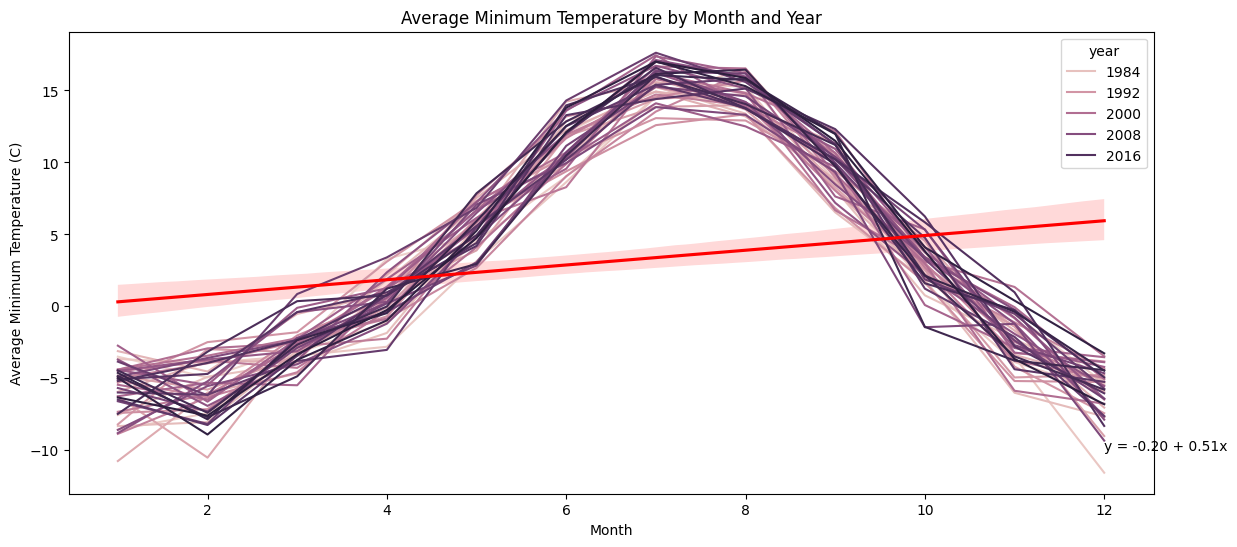

In [26]:


# Group the data by year and month
mean_temp_min_month = df.groupby([df['year'],df['month']])['temp_min'].mean().reset_index()

# Fit a linear regression model to the data
model = sm.OLS(mean_temp_min_month['temp_min'], sm.add_constant(mean_temp_min_month['month'])).fit()

# Extract the equation and coefficient
equation = f"y = {model.params[0]:.2f} + {model.params[1]:.2f}x"


# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Average Minimum Temperature by Month and Year")

# Line plot
sns.lineplot(x="month", y="temp_min", hue="year", data=mean_temp_min_month)

# Trend line
sns.regplot(x="month", y="temp_min", data=mean_temp_min_month, scatter=False, color="red")

# Add equation and coefficient to the plot
plt.text(12, -10, f"{equation}")

# Add label for horizontal axis
plt.xlabel("Month")

# Add label for vertical axis
plt.ylabel("Average Minimum Temperature (C)")

# Show plot
plt.show()


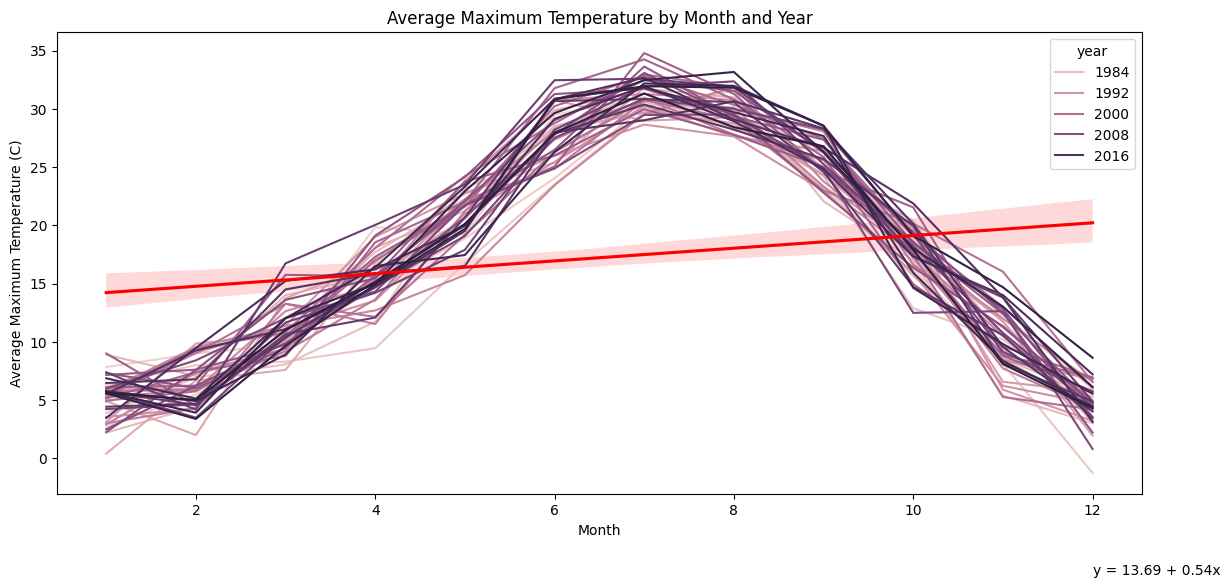

In [27]:


# Group the data by year and month
mean_temp_min_month = df.groupby([df['year'],df['month']])['temp_max'].mean().reset_index()

# Fit a linear regression model to the data
model = sm.OLS(mean_temp_min_month['temp_max'], sm.add_constant(mean_temp_min_month['month'])).fit()

# Extract the equation and coefficient
equation = f"y = {model.params[0]:.2f} + {model.params[1]:.2f}x"


# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Average Maximum Temperature by Month and Year")

# Line plot
sns.lineplot(x="month", y="temp_max", hue="year", data=mean_temp_min_month)

# Trend line
sns.regplot(x="month", y="temp_max", data=mean_temp_min_month, scatter=False, color="red")

# Add equation and coefficient to the plot
plt.text(12, -10, f"{equation}")

# Add label for horizontal axis
plt.xlabel("Month")

# Add label for vertical axis
plt.ylabel("Average Maximum Temperature (C)")

# Show plot
plt.show()

<Axes: xlabel='weather', ylabel='count'>

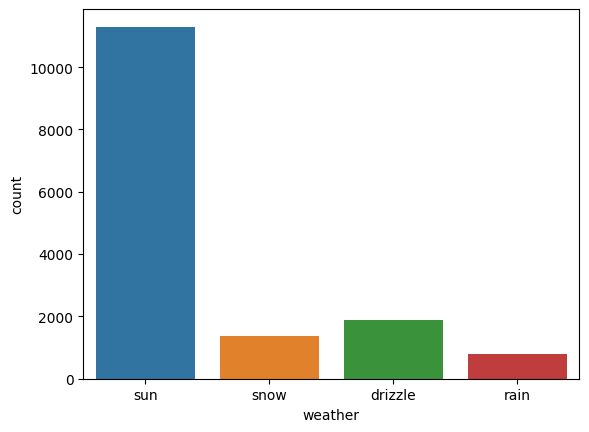

In [29]:
sns.countplot(data=df, x='weather')

C:\Users\nwba2\AppData\Local\Temp\ipykernel_3620\3690560650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,)


<Axes: >

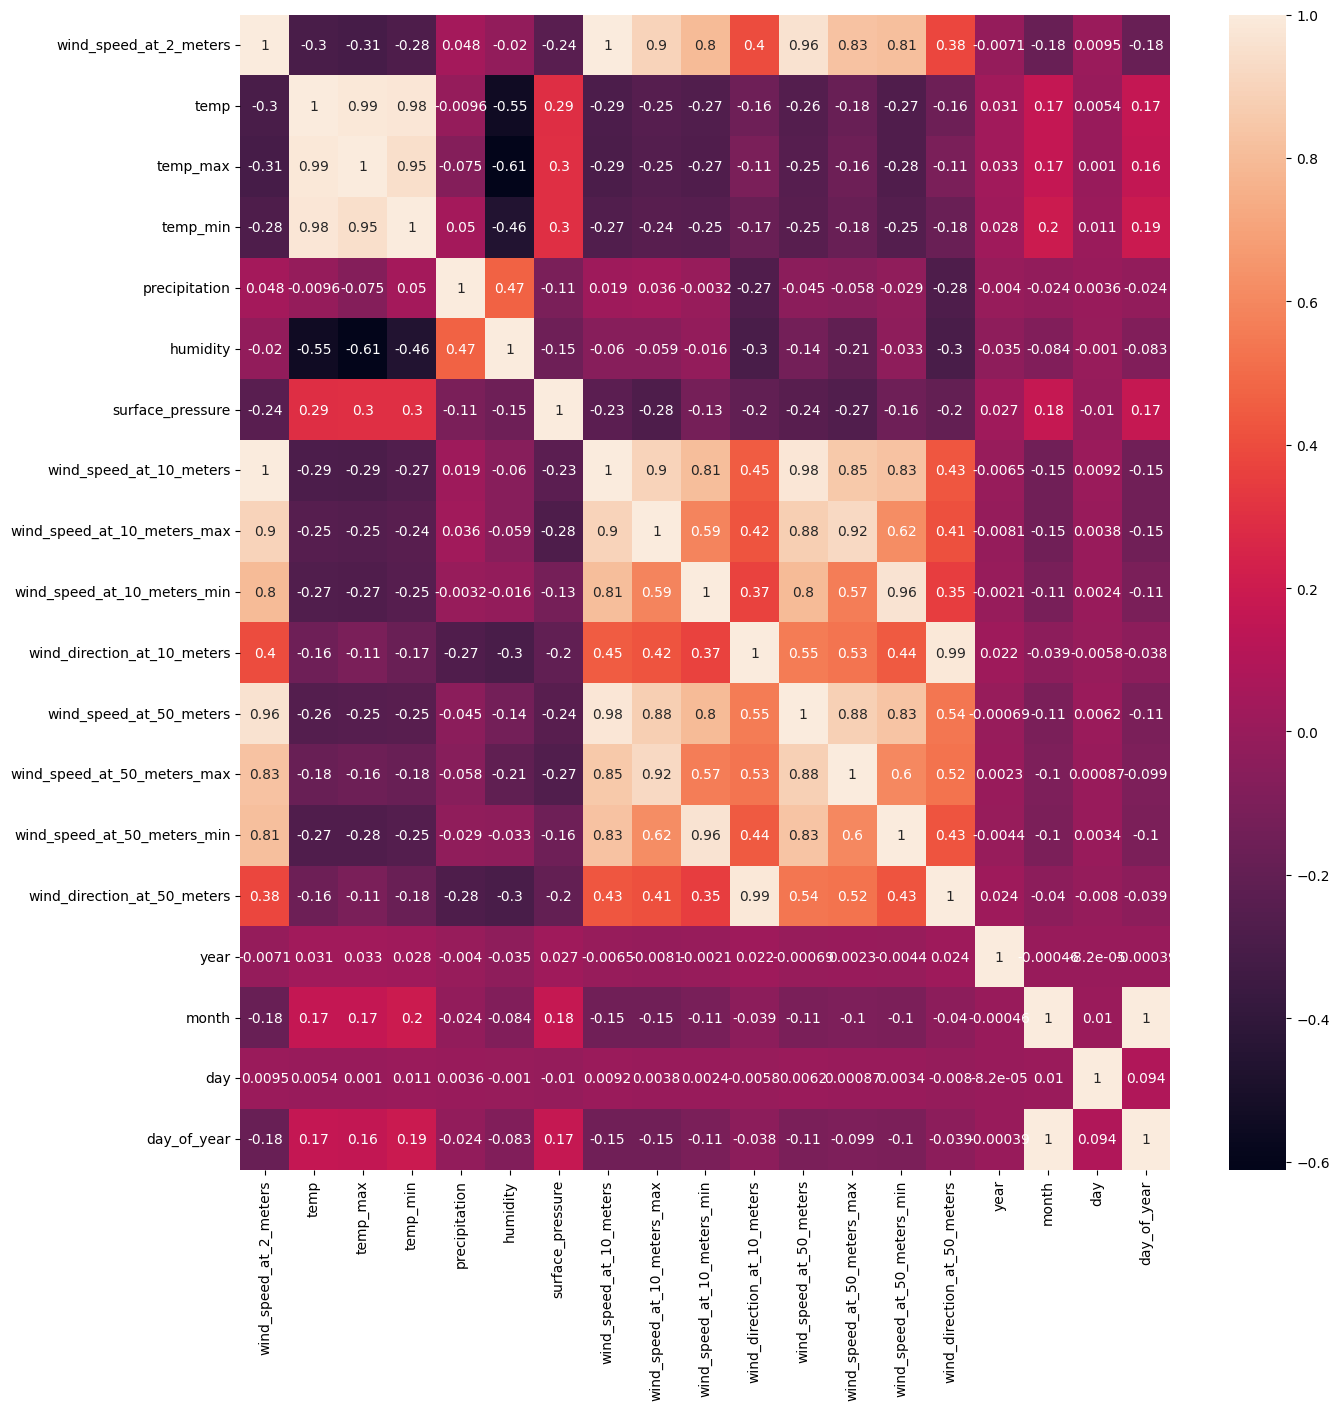

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=True,)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15337 entries, 19810101 to 20221231
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   wind_speed_at_2_meters       15337 non-null  float64       
 1   temp                         15337 non-null  float64       
 2   temp_max                     15337 non-null  float64       
 3   temp_min                     15337 non-null  float64       
 4   precipitation                15337 non-null  float64       
 5   humidity                     15337 non-null  float64       
 6   surface_pressure             15337 non-null  float64       
 7   wind_speed_at_10_meters      15337 non-null  float64       
 8   wind_speed_at_10_meters_max  15337 non-null  float64       
 9   wind_speed_at_10_meters_min  15337 non-null  float64       
 10  wind_direction_at_10_meters  15337 non-null  float64       
 11  wind_speed_at_50_meters      15337 n

### Regression model that will try to predict precitpitation from surface pressure

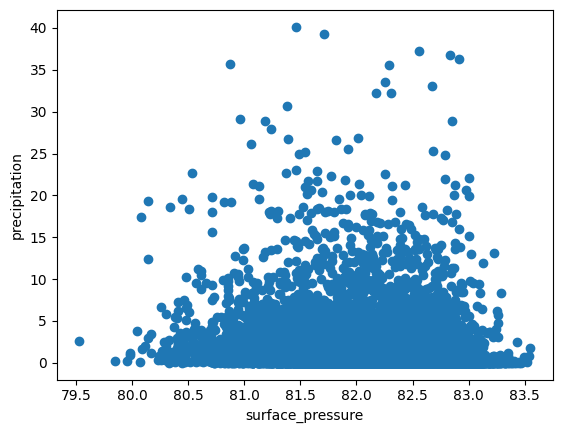

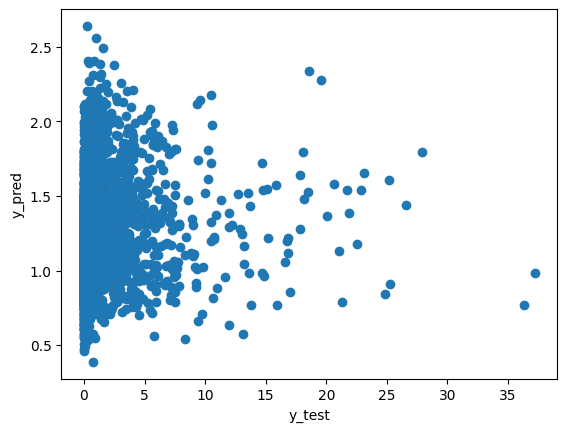

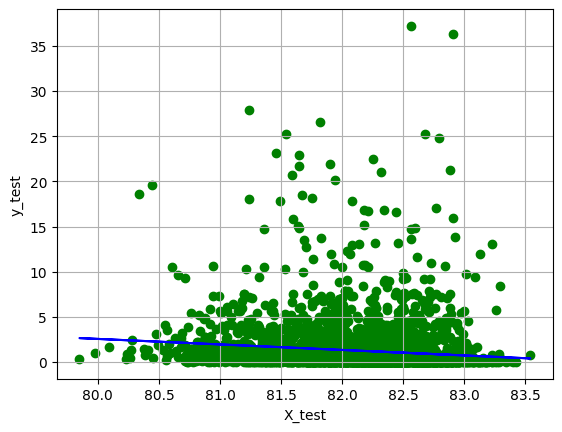

R2 : 0.000615193054256058
mean_squared_error : 8.378873761633969


In [32]:
#Define X as surface_pressure
X=df.iloc[:,6].values
#Define Y as precitpitation
Y=df.iloc[:,4].values

plt.scatter(X,Y)
plt.xlabel('surface_pressure')
plt.ylabel('precipitation')
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

from sklearn.linear_model import LinearRegression
ref = LinearRegression()
ref.fit(X_train, y_train)
y_pred = ref.predict(X_test)

plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test,y_pred,color='blue')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.grid()
plt.show()

r2 = ref.score(X_test, y_test)
print('R2 :',r2)
print("mean_squared_error :",metrics.mean_squared_error(y_test, y_pred))

We cannot predict precitpitation from surface pressure

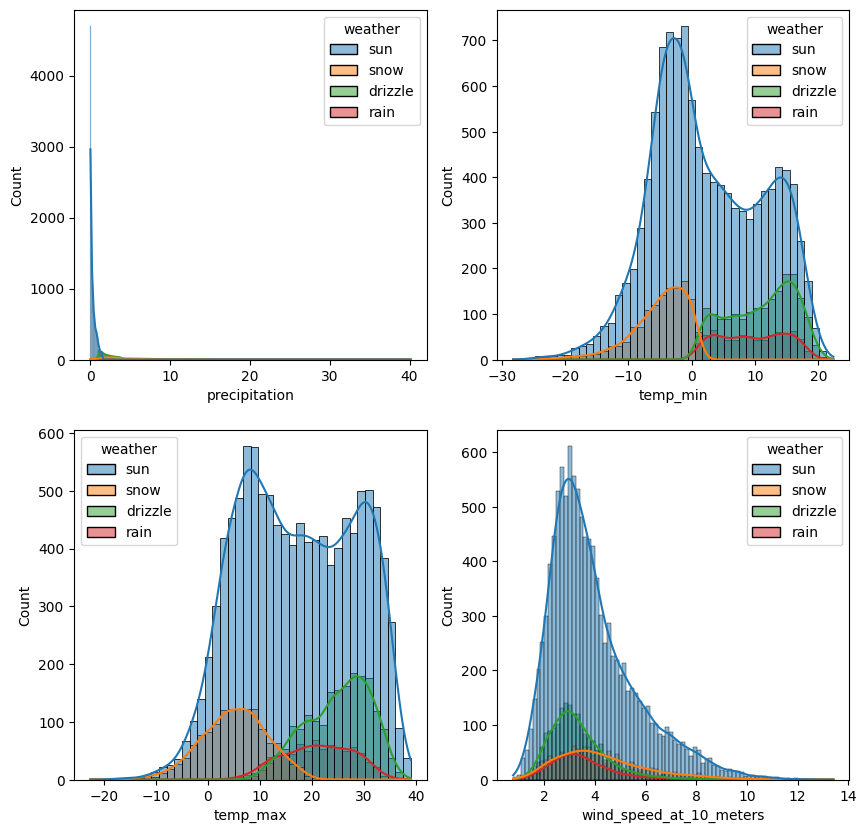

In [33]:
#Some histograms to try and find trends and approve of what we know
cols = ['precipitation', 'temp_max', 'temp_min','wind_speed_at_10_meters']

fig,axes = plt.subplots(2,2, figsize=(10,10))
for i in range(4):
    sns.histplot(kde=True, data=df, x=cols[i], hue='weather', ax= axes[i%2, i//2])

## Trying to use a linear regression model to predict precipitation

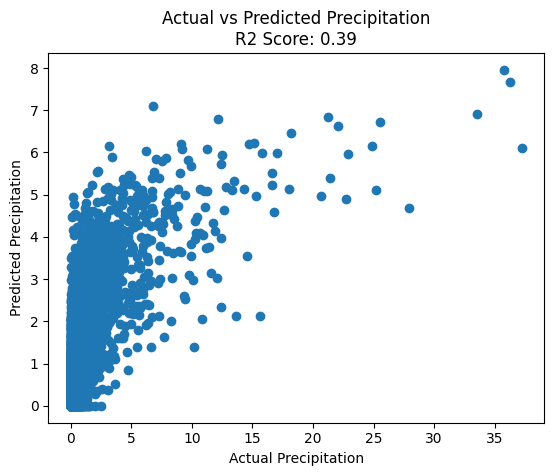

In [34]:

# Split the data into features and target
X = df[['temp_min', 'temp_max','temp','humidity','surface_pressure','wind_speed_at_10_meters','wind_speed_at_2_meters']]
y = df['precipitation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)
y_pred = np.clip(y_pred, 0, None)

# Create a prediction column in the test set
X_test['prediction'] = y_pred

# Calculate the R2 score of the model
r2 = r2_score(y_test, y_pred)

# Plot the actual vs predicted precipitation values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs Predicted Precipitation\nR2 Score: {:.2f}'.format(r2))
plt.show()

## Maybe Random Forest Regressor model will be better

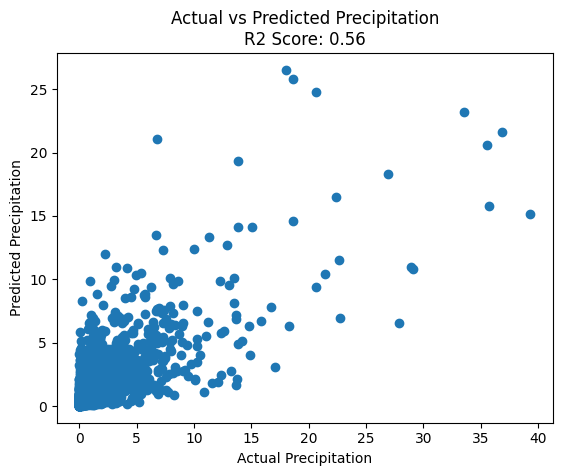

In [35]:


# Split the data into features and target
X = df[['temp_min', 'temp_max','temp','humidity','surface_pressure','wind_speed_at_10_meters','wind_speed_at_2_meters']]
y = df['precipitation']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Create a prediction column in the test set
X_test['prediction'] = y_pred

# Calculate the R2 score of the model
r2 = r2_score(y_test, y_pred)

# Plot the actual vs predicted precipitation values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs Predicted Precipitation\nR2 Score: {:.2f}'.format(r2))
plt.show()

## *it is better!*

### Remove outliars using IQR model

In [36]:
#Trying to take out the outliers to improve the model

df_for_prediction = df[['temp_min', 'temp_max','temp','humidity','surface_pressure','wind_speed_at_10_meters','wind_speed_at_2_meters','precipitation']]

import numpy as np

# Create a copy of the original dataframe
df_outliers = df_for_prediction.copy()

# Calculate the IQR for each numerical column
for column in df_for_prediction.select_dtypes(include=['float64']).columns: #if you want also to include column type 'int64' so add it next to float64
    Q1 = df_for_prediction[column].quantile(0.25)
    Q3 = df_for_prediction[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Mark the outliers in a new column
    df_outliers[f"{column}_outlier"] = np.where((df_for_prediction[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)), 1, 0)

outlier_columns = [col for col in df_outliers.columns if '_outlier' in col]
df_for_prediction['any_outlier'] = df_outliers[outlier_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Show the resulting dataframe

count = df_for_prediction[df_for_prediction['any_outlier'] == 1].shape[0]
print("Number of rows with outliers:", count)

df_without_outliers_for_pred = df_for_prediction[df_for_prediction['any_outlier'] == 0]



Number of rows with outliers: 2455


C:\Users\nwba2\AppData\Local\Temp\ipykernel_3620\3392024482.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_prediction['any_outlier'] = df_outliers[outlier_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)


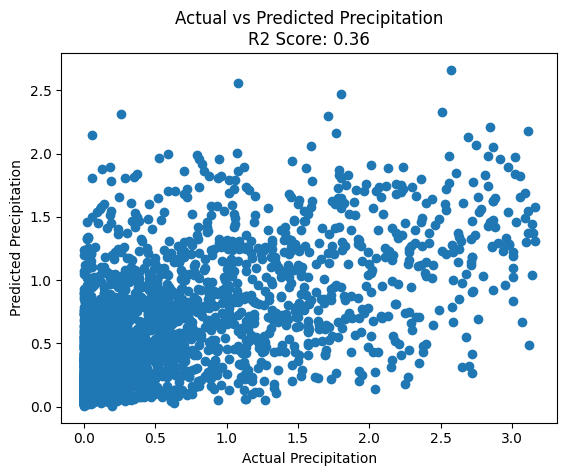

In [37]:
# Split the data into features and target
X = df_without_outliers_for_pred[['temp_min', 'temp_max','temp','humidity','surface_pressure','wind_speed_at_10_meters','wind_speed_at_2_meters']]
y = df_without_outliers_for_pred['precipitation']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Create a prediction column in the test set
X_test['prediction'] = y_pred

# Calculate the R2 score of the model
r2 = r2_score(y_test, y_pred)

# Plot the actual vs predicted precipitation values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs Predicted Precipitation\nR2 Score: {:.2f}'.format(r2))
plt.show()

removing outliers using IQR didn't help :/

Maybe let's try the zscore method to remove outliers:

In [39]:
warnings.filterwarnings("ignore")

#Trying to take out the outliers to improve the model

df_for_prediction_zscore = df[['temp_min', 'temp_max','temp','humidity','surface_pressure','wind_speed_at_10_meters','wind_speed_at_2_meters','precipitation']]


for col in df_for_prediction_zscore.select_dtypes(include=['int64', 'float64']).columns:
    # Calculate the mean and standard deviation of the column
    mean = df_for_prediction_zscore[col].mean()
    std = df_for_prediction_zscore[col].std()

    # Calculate the Z-scores of each value in the column
    z_scores = (df[col] - mean) / std

    # Mark the outliers in a new column
    df_for_prediction_zscore.loc[np.abs(z_scores) > 3, f"{col}_outlier"] = True

outlier_columns = [col for col in df_for_prediction_zscore.columns if '_outlier' in col]
df_for_prediction_zscore['any_outlier'] = df_for_prediction_zscore[outlier_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Show the resulting dataframe

count = df_for_prediction_zscore[df_for_prediction_zscore['any_outlier'] == 1].shape[0]
print("Number of rows with outliers:", count)

#
df_without_outliers_for_pred_zscore = df_for_prediction_zscore[df_for_prediction_zscore['any_outlier'] == 0]
warnings.filterwarnings("default")

Number of rows with outliers: 626


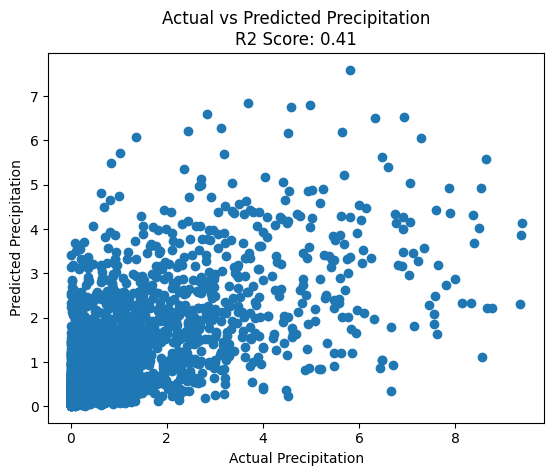

In [40]:
# Split the data into features and target

X = df_without_outliers_for_pred_zscore[['temp_min', 'temp_max','temp','humidity','surface_pressure','wind_speed_at_10_meters','wind_speed_at_2_meters']]
y = df_without_outliers_for_pred_zscore['precipitation']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Create a prediction column in the test set
X_test['prediction'] = y_pred

# Calculate the R2 score of the model
r2 = r2_score(y_test, y_pred)

# Plot the actual vs predicted precipitation values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Precipitation')
plt.ylabel('Predicted Precipitation')
plt.title('Actual vs Predicted Precipitation\nR2 Score: {:.2f}'.format(r2))
plt.show()

Using Zscore was better than IQR but still not enough